2. (30%) Considering the parsimonious principle in modeling, set up LR, 𝑘NN, and SVM models using as few variables (pixels) to get as close as possible to the results in EX1.

In [ ]:
from PIL import Image
import numpy as np
from numpy import array
from tkinter import _flatten
import math
import matplotlib.pyplot as plt
import os


In [ ]:
import numpy

# 1 - 0, 2 - 1, 3 - 1, 4 - 1, 5 - 1, 6 - 1, 7 - 1, 8 - 0, 9 - 1, 10 - 0, 11 - 1, 12 - 0, 13 - 1, 14 - 1, 15 - 1
# 16 - 1, 17 - 1, 18 - 1, 19 - 1, 20 - 1, 21 - 1, 22 - 1, 23 - 1, 24 - 1, 25 - 1, 26 - 1, 27 - 1, 28 - 1, 29 - 1, 30 - 1
# 31 - 1, 32 - 0, 33 - 1, 34 - 1, 35 - 1, 36 - 1, 37 - 1, 38 - 1, 39 - 1, 40 - 1  
gender = [0, 1, 1, 1, 1, 1, 1, 0, 1, 0,1, 0, 1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1]
len(gender)

final = []
for i in gender:
  if i == 0:
    for j in range(0,10):
      final.append(0)
    #new_list = [0,0,0,0,0,0,0,0,0,0]
  else:
    for j in range(0,10):
      final.append(1)


 
gender = np.asarray(final)
gender = np.expand_dims(gender, axis=1)
gender.shape

y = gender


In [ ]:
from PIL import Image


def load_images_from_folder(folder):
  i = 1
  for filename in os.listdir(folder):
    im = Image.open(os.path.join(folder,filename))
    data = np.array(im)
    flattened = data.flatten()
    reshape_fla = np.expand_dims(flattened, axis=0)
    if i == 1:
      final = reshape_fla
      i = 2
    else:
      final = np.vstack((final,reshape_fla))

  return final


pixels = load_images_from_folder('/content/drive/MyDrive/Colab Notebooks/homework_7/faces')

pixels.shape

X = pixels

Using LASSO reduce the size of data

finding & plotting down the important pixels

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha = 0.001, normalize = True) 
lasso.fit(X, y)
n = np.sum(lasso.coef_ != 0)


pixels = []

for i in range(len(lasso.coef_)):
  if lasso.coef_[i] != 0: 
    pixels.append(i)

print(pixels)

[173, 698, 924, 1009, 1028, 1052, 1093, 1118, 1132, 1142, 1153, 1165, 1169, 1191, 1240, 1355, 1400, 1408, 1538, 1581, 1611, 1657, 1673, 1707, 1713, 1787, 1795, 1812, 1845, 1906, 2085, 2431, 2539, 2566]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,


In [ ]:
import math

x_pos = []
y_pos = []
width = 46

for pixel in pixels:
  y_posi = pixel//width 
  x_posi = (pixel - (width*y_posi)) + 1 
  x_pos.append(x_posi)
  y_pos.append(y_posi)

x_pos.append(46)
y_pos.append(56)

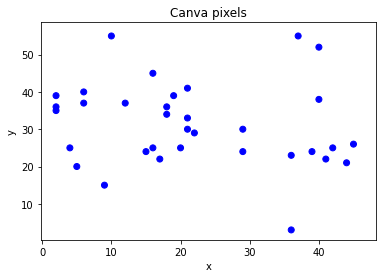

In [ ]:
import matplotlib.pyplot as plt

colors = []

for i in range(0,len(pixels)):
  colors.append("b")

colors.append("w")


plt.scatter(x_pos,y_pos, c=colors)

plt.title('Canva pixels')
plt.xlabel('x')
plt.ylabel('y')

plt.show()

selecting important pixels

In [ ]:
X_imp = np.zeros((400, len(pixels)))
X_imp = X.T[pixels]
X_imp = X_imp.T

split and normalize the training, testing dataset

In [ ]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn import svm

In [ ]:
X_imp_train, X_imp_test, y_train, y_test = train_test_split(X_imp, y, test_size=0.2, random_state=1)


Logistic Regression

In [ ]:
LR = LogisticRegression()
LR.fit(X_imp_train, y_train)
predictions_LR = LR.predict(X_imp_test)
print("LR predictions: ", predictions_LR)
print("LR accuracy using LASSO: ", 100* LR.score(X_imp_test, y_test),"%")

LR predictions:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 0 1 1
 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1]
LR accuracy using LASSO:  91.25 %


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


K-Nearest Neighbor

In [ ]:
KNN = KNeighborsClassifier(n_neighbors = 3)
KNN.fit(X_imp_train,y_train)
predictions_KNN = LR.predict(X_imp_test)
print("KNN predictions: ", predictions_KNN)
print("KNN accuracy using LASSO: ",100*KNN.score(X_imp_test, y_test),"%")

KNN predictions:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 0 1 1
 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1]
KNN accuracy using LASSO:  86.25 %


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Support Vector Machine

In [ ]:
SVM = svm.SVC(kernel='linear',C=1)
SVM.fit(X_imp_train,y_train)
predictions_SVM = SVM.predict(X_imp_test)
print("SVM predictions: ", predictions_SVM)
print("SVM accuracy using LASSO: ",100*SVM.score(X_imp_test, y_test),"%")

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVM predictions:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1]
SVM accuracy using LASSO:  93.75 %


Conclusion:

The predictions using LASSO were much better. We still have the problem of the biased introduced by an inequal dataset. However, by using LASSO, we could improve the results for this issue a bit. All three machine learning had better accuracy. 